In [1]:
import pandas as pd
import numpy as np

custumers_data = pd.read_excel("/Users/giulianamiranda/Documents/Labs/lab-customer-analysis-round-2/files_for_lab/excel_files/marketing_customer_analysis.xlsx")
custumers_data

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [2]:
# Show the dataframe shape
custumers_data.shape

(10910, 26)

In [3]:
# Standardize header names
cols = []

for i in range(len(custumers_data.columns)):
    cols.append(custumers_data.columns[i].lower().replace(' ', '_'))
    
custumers_data.columns = cols 
custumers_data

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
# Which columns are numerical? Which columns are categorical?
custumers_data.dtypes

unnamed:_0                                int64
customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                        

In [5]:
# Numerical: unnamed:_0 , customer_lifetime_value , income , monthly_premium_auto, months_since_last_claim, months_since_policy_inception, number_of_open_complaints, number_of_policies ,  total_claim_amount        

In [6]:
custumers_data.isnull().sum()

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [7]:
# Check and deal with NaN values

condition = custumers_data['vehicle_size'].isnull()
filtered_data = custumers_data[condition]
filtered_data


,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
87,87,ZH92587,Oregon,8126.766397,No,Basic,College,2011-02-22,Disabled,F,...,NaN,3,Personal Auto,Personal L3,Offer1,Agent,513.600000,NaN,NaN,NaN
88,88,CJ51511,Arizona,13466.920710,Yes,Basic,High School or Below,2011-02-23,Disabled,F,...,NaN,2,Corporate Auto,Corporate L3,Offer2,Agent,571.200000,NaN,NaN,NaN
89,89,ME37450,Arizona,5210.348372,No,Basic,Bachelor,2011-01-04,Employed,M,...,0.0,5,Special Auto,Special L2,Offer1,Agent,37.960537,NaN,NaN,A
97,97,CA22248,Oregon,2505.420430,No,Basic,Master,2011-02-14,Employed,F,...,0.0,1,Personal Auto,Personal L3,Offer2,Branch,46.278027,NaN,NaN,A
148,148,HB24005,California,2347.048112,No,Basic,College,2011-02-02,Employed,M,...,1.0,1,Personal Auto,Personal L1,Offer1,Agent,244.269407,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10852,10852,KZ80424,Washington,8382.478392,Yes,Basic,Bachelor,2011-01-27,Employed,M,...,0.0,2,Personal Auto,Personal L2,Offer2,Call Center,791.878042,NaN,NaN,A
10860,10860,GA79817,Arizona,2369.111588,No,Basic,Bachelor,2011-02-05,Unemployed,M,...,0.0,1,Corporate Auto,Corporate L2,Offer3,Call Center,468.000000,NaN,NaN,NaN
10879,10879,FK95213,California,18611.453560,No,Extended,Master,2011-01-16,Employed,F,...,0.0,7,Personal Auto,Personal L3,Offer2,Web,1021.654003,NaN,NaN,NaN
10883,10883,FD64348,Oregon,22563.618380,No,Basic,High School or Below,2011-01-17,Employed,M,...,3.0,2,Personal Auto,Personal L3,Offer4,Branch,1.687291,NaN,NaN,A


In [8]:
# Check and deal with NaN values => I'm taking a better look at the data and the NaN values

print(custumers_data['state'].unique())
condition = custumers_data['state'].isnull()
filtered_data = custumers_data[condition]
filtered_data.head(50)


['Arizona' 'California' 'Washington' 'Oregon' nan 'Nevada']


,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
5,5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2011-02-14,Employed,M,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
11,11,GE63585,NaN,2420.711888,NaN,Basic,Bachelor,2011-02-07,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer1,Call Center,199.551735,Two-Door Car,Medsize,NaN
58,58,BR69566,NaN,14019.833140,NaN,Basic,College,2011-02-18,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer4,Call Center,469.882367,Two-Door Car,Small,NaN
62,62,UF44021,NaN,2108.493744,NaN,Basic,Bachelor,2011-01-02,Unemployed,M,...,0.0,1,Personal Auto,Personal L2,Offer1,Agent,351.856810,Two-Door Car,Medsize,NaN
126,126,TE60343,NaN,4716.264294,NaN,Basic,High School or Below,2011-02-25,Employed,M,...,1.0,3,Corporate Auto,Corporate L3,Offer2,Agent,292.800000,Four-Door Car,Medsize,A
131,131,QK24293,NaN,6265.343299,NaN,Extended,Doctor,2011-01-13,Unemployed,F,...,1.0,4,Corporate Auto,Corporate L1,Offer1,Agent,481.025786,Four-Door Car,Medsize,NaN
155,155,JG35886,NaN,4111.888285,NaN,Premium,College,2011-01-21,Employed,F,...,0.0,1,Personal Auto,Personal L2,Offer2,Call Center,480.073548,Four-Door Car,Medsize,A
168,168,FV22585,NaN,6960.920371,NaN,Extended,College,2011-02-04,Employed,M,...,0.0,3,Personal Auto,Personal L1,Offer1,Call Center,16.711329,Four-Door Car,Medsize,NaN
169,169,AU23837,NaN,5010.379310,NaN,Basic,Bachelor,2011-01-19,Employed,F,...,NaN,7,Corporate Auto,Corporate L3,Offer1,Agent,295.871784,Four-Door Car,Large,A
190,190,VZ18907,NaN,21991.615980,NaN,Basic,College,2011-01-12,Employed,F,...,0.0,2,Personal Auto,Personal L3,Offer2,Branch,132.139111,SUV,Large,NaN


In [9]:
custumers_data[custumers_data.duplicated()]

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type


In [10]:
# Dealing with Nan at the column vehicle_type

print(custumers_data['vehicle_type'].unique())

# More than half of the values are NaN. Also, there´s only one other option "A". So, I believe the best option is to drop the entire column 

custumers_data.drop(['vehicle_type'], inplace=True, axis=1)

custumers_data.columns

[nan 'A']


Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [11]:
# The total income is  409.520.867
custumers_data['income'].sum()

409520867

In [12]:
# The visual analysis shows that that Nan in 4 columns are closely related. 
# It´s important to check the possible impact of the removal of rows with the NaN on the total income

hip_custumers_data = custumers_data
hip_custumers_data = hip_custumers_data.dropna()
hip_custumers_data
hip_custumers_data['income'].sum()

# The income without the NaN values is 343.962.509

# Thats a 15% difference. I´d say i'd keep the NaN for now and later deal with them, once I figure out what is the most important category of data 

343962509

In [13]:
# Datetime format - Extract the months from the dataset and store in a separate column 
 
import time 
df = custumers_data['effective_to_date'].dt.month
print(df.unique())

custumers_data['month'] = custumers_data['effective_to_date'].dt.month
custumers_data

[2 1]


,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


In [14]:
#Filtering to show only first quarter 

condition = (custumers_data['month'] >= 1) & (custumers_data['month'] <= 3)
custumers_data[condition]

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


In [15]:
# BONUS: Put all the previously mentioned data transformations into a function.

In [16]:
def optimize(data):
    # Standardize header names
    cols = [col.lower().replace(' ', '_') for col in data.columns]
    data.columns = cols
    
    # show df shape
    print("DF shape:")
    print(data.shape)
    
    # show types
    print("DF Types")
    print(data.dtypes)
    
    # Checking for NaN values
    print("Sum of NaN values")
    print(data.isnull().sum())
    
    # Extract the months from the dataset and store in a separate column 

    data['month'] = data['effective_to_date'].dt.month
    
    condition = (data['month'] >= 1) & (data['month'] <= 3)
    print(data[condition])
    
    return data





In [17]:
optimize(custumers_data)

DF shape:
(10910, 26)
DF Types
unnamed:_0                                int64
customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_off

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


Lab 3

In [18]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

df_custumers_data = pd.read_csv("/Users/giulianamiranda/Documents/Labs/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv")
df_custumers_data

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [19]:
cols2 = []

for i in range(len(df_custumers_data.columns)):
    cols2.append(df_custumers_data.columns[i].lower().replace(' ', '_'))
    
df_custumers_data.columns = cols 


In [20]:
df_custumers_data

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [21]:
df_custumers_data.drop(['vehicle_type'], inplace=True, axis=1)


In [22]:
# Show dataframe info

df_custumers_data.shape

(10910, 25)

In [23]:
df_custumers_data.dtypes

unnamed:_0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [24]:
# Show a plot of the total number of responses.

df_custumers_data['response'] = df_custumers_data['response'].astype(str)
df_custumers_data['response']



0         No
1         No
2         No
3        Yes
4         No
        ... 
10905     No
10906     No
10907     No
10908     No
10909    nan
Name: response, Length: 10910, dtype: object

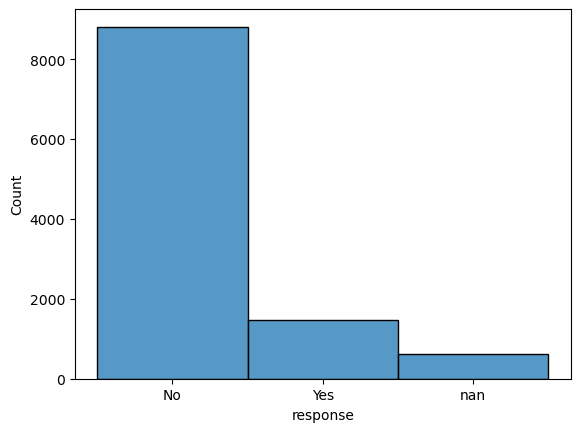

In [25]:
sns.histplot(df_custumers_data['response'])
plt.show()

In [26]:
# Show a plot of the response rate by the sales channel

grouped = df_custumers_data.groupby('sales_channel')['response'].value_counts(normalize=True).unstack().fillna(0)
grouped




response,No,Yes,nan
sales_channel,,,
Agent,0.763892,0.180053,0.056054
Branch,0.840172,0.107876,0.051952
Call Center,0.836992,0.103223,0.059785
Web,0.820418,0.108856,0.070726


In [27]:
grouped['response_rate'] = grouped['Yes'] * 100
grouped



response,No,Yes,nan,response_rate
sales_channel,,,,
Agent,0.763892,0.180053,0.056054,18.005339
Branch,0.840172,0.107876,0.051952,10.787558
Call Center,0.836992,0.103223,0.059785,10.322279
Web,0.820418,0.108856,0.070726,10.885609


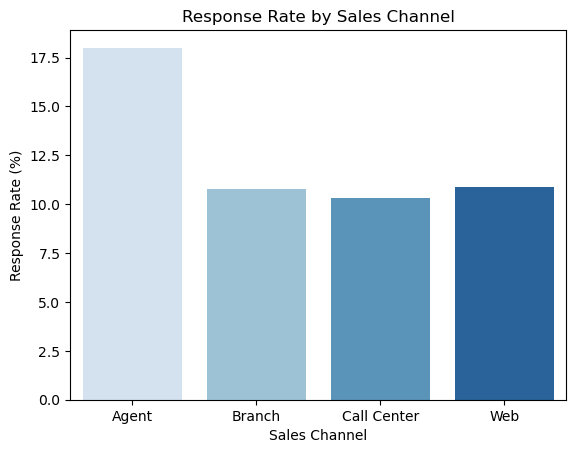

In [28]:
# Reset the index to make 'Sales Channel' a regular column
grouped.reset_index(inplace=True)
grouped

# Create a bar plot to visualize the response rate by sales channel using seaborn
sns.barplot(x='sales_channel', y='response_rate', data=grouped, palette="Blues")

# Set labels and title
plt.xlabel("Sales Channel")
plt.ylabel("Response Rate (%)")
plt.title("Response Rate by Sales Channel")

# Show the plot
plt.show()

In [29]:
# Response rate by claim amount 

grouped_2 = df_custumers_data.groupby('total_claim_amount')['response'].value_counts(normalize=True).unstack().fillna(0)
grouped_2

response,No,Yes,nan
total_claim_amount,,,
0.099007,1.0,0.0,0.0
0.382107,1.0,0.0,0.0
0.423310,1.0,0.0,0.0
0.517753,1.0,0.0,0.0
0.769185,0.5,0.0,0.5
...,...,...,...
2345.413441,1.0,0.0,0.0
2452.894264,1.0,0.0,0.0
2552.343856,1.0,0.0,0.0


In [30]:
grouped_2['response_rate'] = grouped_2['Yes'] * 100
grouped_2.reset_index(inplace=True)
grouped_2.tail(50)



response,total_claim_amount,No,Yes,nan,response_rate
5056,1612.962321,1.000000,0.0,0.000000,0.0
5057,1620.000000,1.000000,0.0,0.000000,0.0
5058,1621.560425,1.000000,0.0,0.000000,0.0
5059,1644.690622,1.000000,0.0,0.000000,0.0
5060,1654.202174,1.000000,0.0,0.000000,0.0
5061,1684.800000,1.000000,0.0,0.000000,0.0
5062,1706.400000,1.000000,0.0,0.000000,0.0
5063,1724.234933,1.000000,0.0,0.000000,0.0
5064,1737.320276,1.000000,0.0,0.000000,0.0
5065,1742.400000,1.000000,0.0,0.000000,0.0


In [31]:
grouped_2["response_rate"].unique()

array([  0.        , 100.        ,  87.5       ,  75.        ,
        85.71428571,  88.88888889,  90.90909091,  16.17647059,
        18.51851852,   7.36842105,  70.        ,  20.45454545,
        33.09352518,  15.51724138,  13.13131313,  21.8487395 ,
        22.22222222,  12.17391304,  31.78294574,   6.06060606,
        43.75      ,  20.68965517,  17.64705882,  27.5862069 ,
        35.13513514,  30.        ,  77.77777778,  31.25      ,
        22.58064516,  66.66666667,  15.38461538,  20.        ,
        20.96774194,  23.07692308,  16.66666667,  13.7254902 ,
        33.33333333,  25.        ,  26.76056338,  32.55813953,
        11.53846154,  18.30985915,  43.47826087,  21.875     ,
        37.73584906,  16.27906977,  21.95121951,  27.45098039,
        13.46153846,  29.16666667,  48.97959184,  14.58333333,
        36.36363636,  48.14814815,  31.57894737,  23.68421053,
        46.66666667,  46.15384615,  56.25      ,  50.        ,
        54.54545455])

In [32]:
grouped_2.head(50)

response,total_claim_amount,No,Yes,nan,response_rate
0,0.099007,1.000000,0.0,0.000000,0.0
1,0.382107,1.000000,0.0,0.000000,0.0
2,0.423310,1.000000,0.0,0.000000,0.0
3,0.517753,1.000000,0.0,0.000000,0.0
4,0.769185,0.500000,0.0,0.500000,0.0
5,0.887629,1.000000,0.0,0.000000,0.0
6,1.208908,1.000000,0.0,0.000000,0.0
7,1.332349,0.500000,0.0,0.500000,0.0
8,1.489470,1.000000,0.0,0.000000,0.0
9,1.587888,1.000000,0.0,0.000000,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

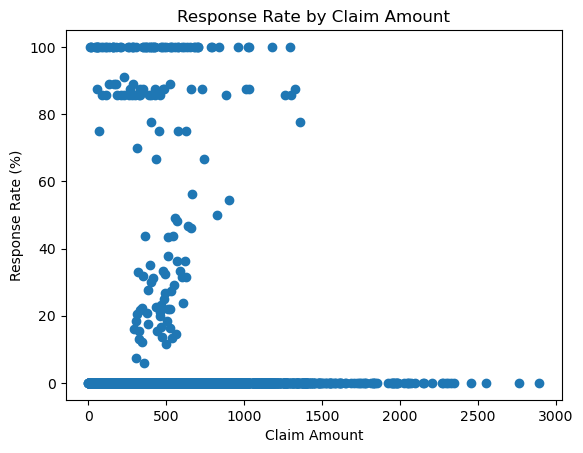

In [33]:

plt.scatter(x = grouped_2['total_claim_amount'], y = grouped_2['response_rate'])
plt.xlabel("Claim Amount")
plt.ylabel("Response Rate (%)")
plt.title("Response Rate by Claim Amount")

plt.show



In [34]:
# Show a plot of the response rate by income

grouped_3 = df_custumers_data.groupby('income')['response'].value_counts(normalize=True).unstack().fillna(0)
grouped_3['response_rate'] = grouped_3['Yes'] * 100
grouped_3.reset_index(inplace=True)
grouped_3.head(50)

response,income,No,Yes,nan,response_rate
0,0,0.858271,0.081091,0.060639,8.109078
1,10037,1.000000,0.000000,0.000000,0.000000
2,10074,1.000000,0.000000,0.000000,0.000000
3,10097,1.000000,0.000000,0.000000,0.000000
4,10105,1.000000,0.000000,0.000000,0.000000
5,10147,1.000000,0.000000,0.000000,0.000000
6,10180,1.000000,0.000000,0.000000,0.000000
7,10194,1.000000,0.000000,0.000000,0.000000
8,10211,1.000000,0.000000,0.000000,0.000000
9,10237,1.000000,0.000000,0.000000,0.000000


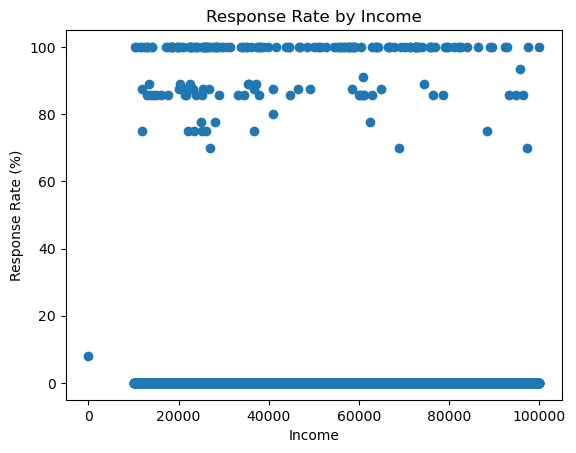

In [35]:
plt.scatter(x = grouped_3['income'], y = grouped_3['response_rate'])
plt.xlabel("Income")
plt.ylabel("Response Rate (%)")
plt.title("Response Rate by Income")

plt.show()


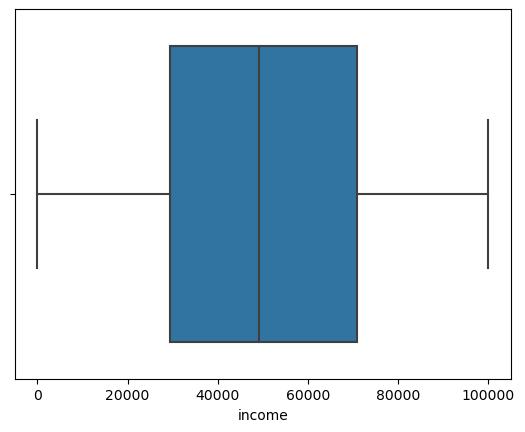

In [36]:
sns.boxplot(x = grouped_3['income'], data = grouped_3)
plt.show()

Complete the following task

- Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical variables look like a normal distribution
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [37]:
# Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns

df_custumers = pd.read_excel("/Users/giulianamiranda/Documents/Labs/lab-customer-analysis-round-2/files_for_lab/excel_files/marketing_customer_analysis.xlsx")


cols_5 = []

for i in range(len(df_custumers.columns)):
    cols_5.append(df_custumers.columns[i].lower().replace(' ', '_'))
    
df_custumers.columns = cols_5

df_custumers

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [38]:
df_custumers.dtypes

unnamed:_0                                int64
customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                        

In [47]:
# The numerical columns
numerical = df_custumers.select_dtypes(include=[np.number])
numerical

numerical


,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [40]:
# Select categorical columns
categoricals = df_custumers.select_dtypes(include=[object])
categoricals

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


Index(['unnamed:_0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount'],
      dtype='object')


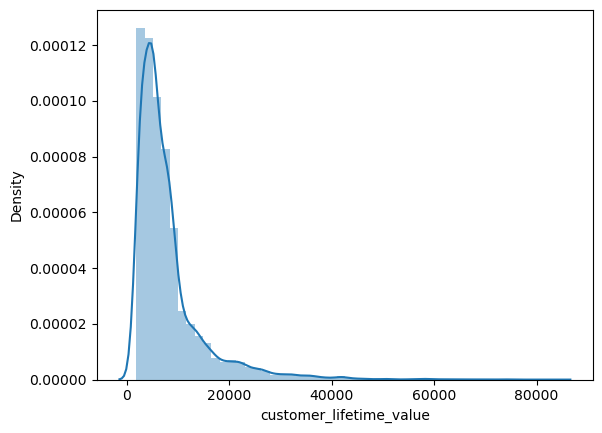

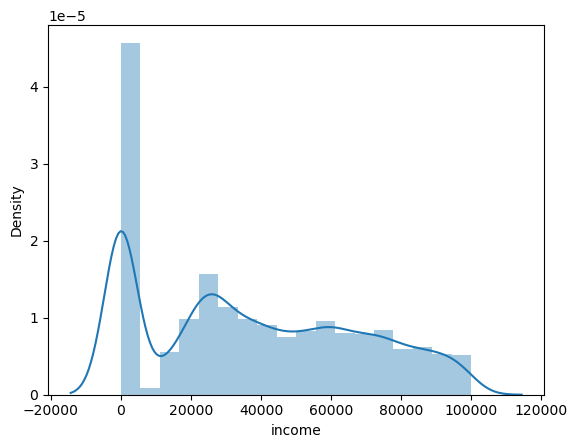

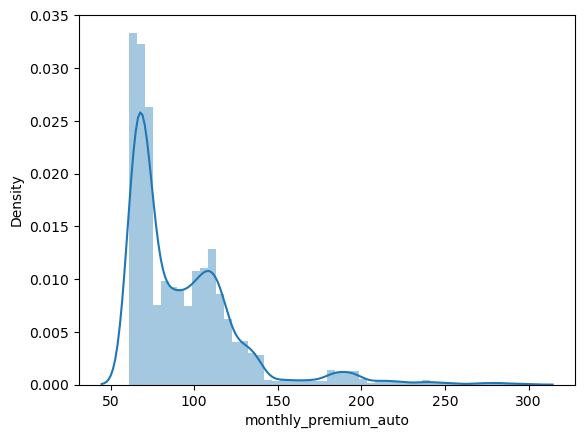

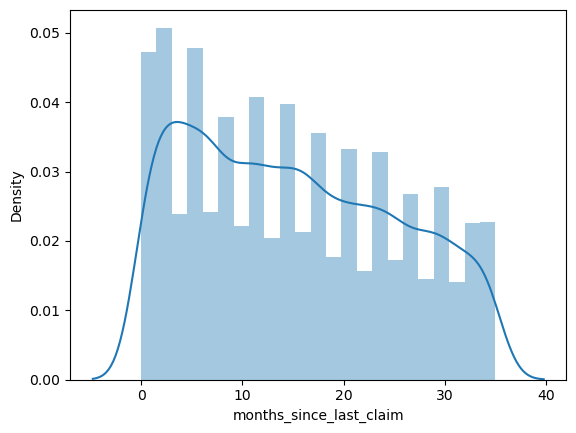

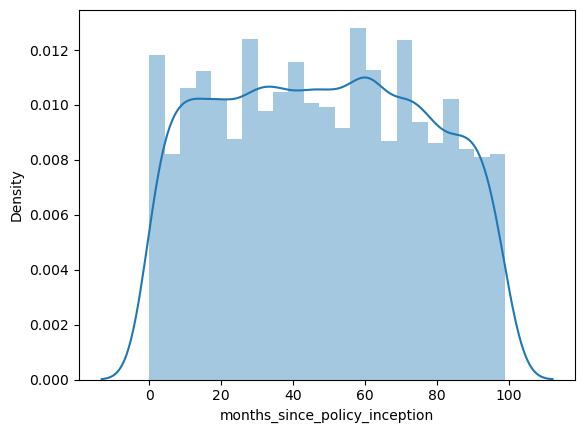

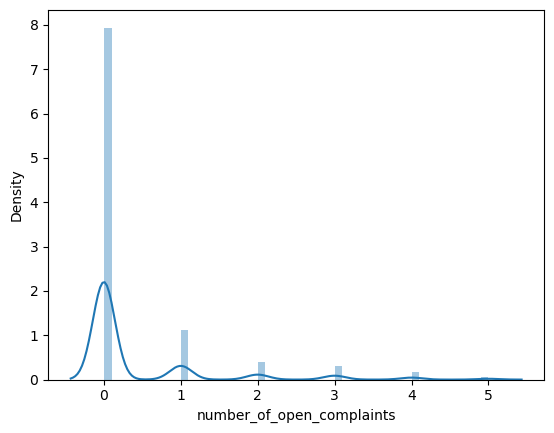

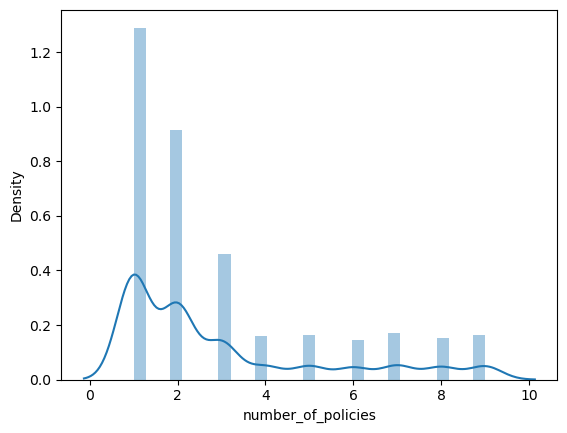

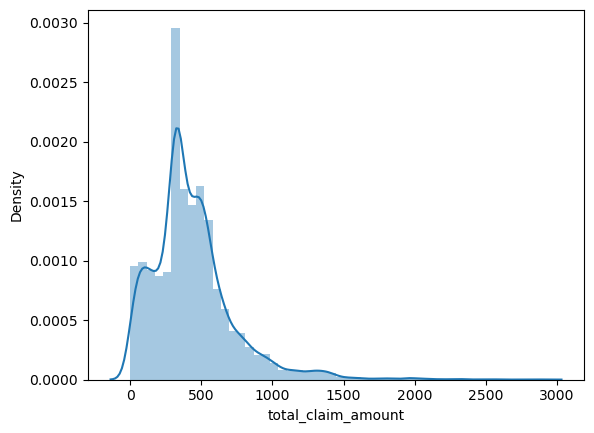

In [57]:
# Use seaborn library to construct distribution plots for the numerical variables
print(numerical.columns)
sns.distplot(numerical['customer_lifetime_value'])
plt.show()

sns.distplot(numerical['income'])
plt.show()

sns.distplot(numerical['monthly_premium_auto'])
plt.show()

sns.distplot(numerical['months_since_last_claim'])
plt.show()

sns.distplot(numerical['months_since_policy_inception'])
plt.show()

sns.distplot(numerical['number_of_open_complaints'])
plt.show()

sns.distplot(numerical['number_of_policies'])
plt.show()

sns.distplot(numerical['total_claim_amount'])
plt.show()


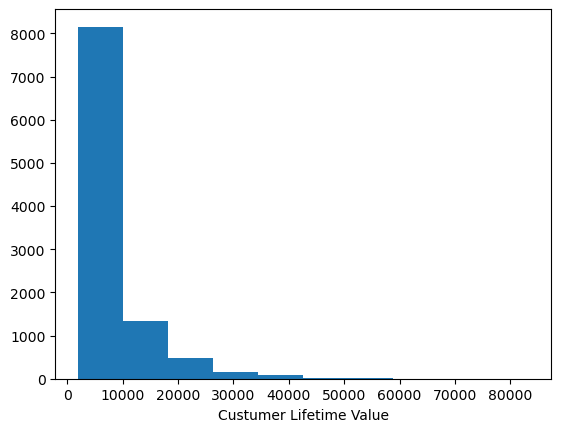

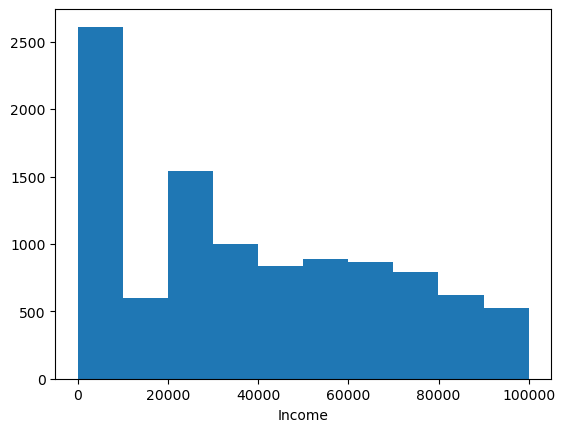

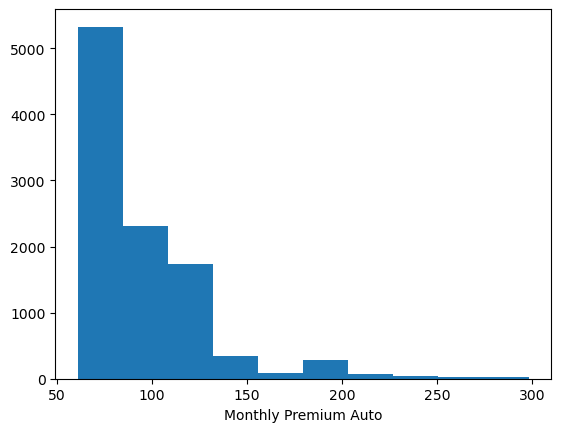

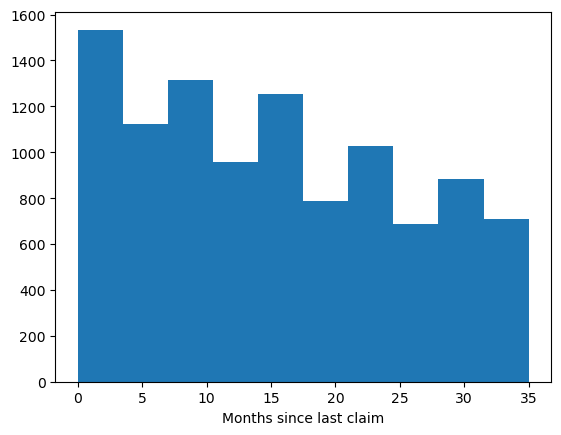

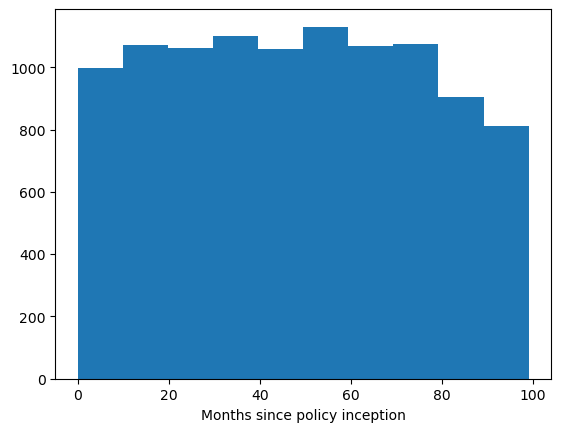

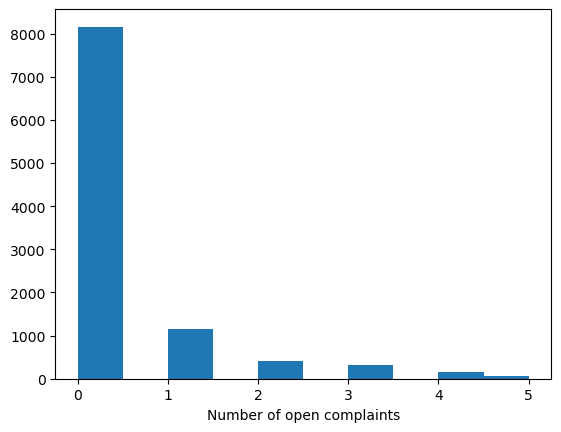

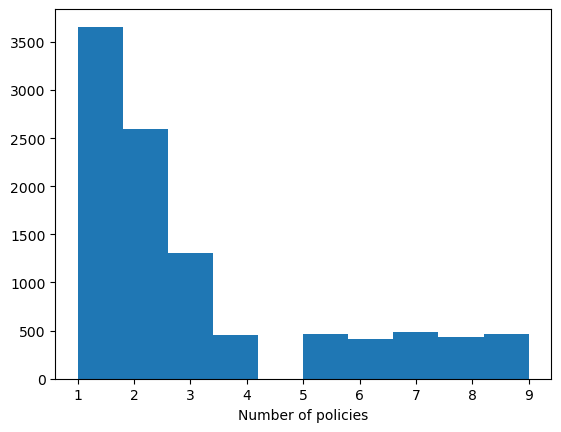

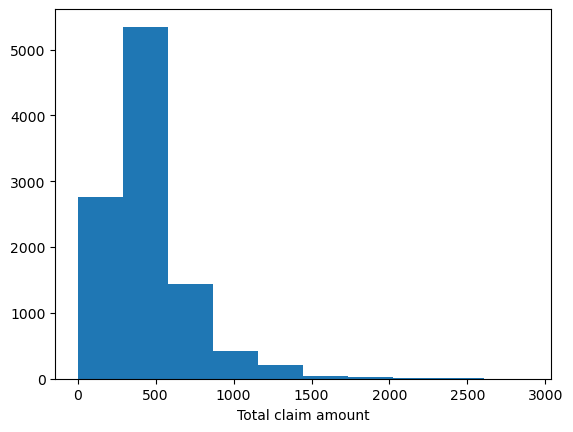

In [61]:
# Use Matplotlib to construct histograms

plt.hist(numerical['customer_lifetime_value'])
plt.xlabel('Custumer Lifetime Value')
plt.show()

plt.hist(numerical['income'])
plt.xlabel('Income')
plt.show()

plt.hist(numerical['monthly_premium_auto'])
plt.xlabel('Monthly Premium Auto')
plt.show()

plt.hist(numerical['months_since_last_claim'])
plt.xlabel('Months since last claim')
plt.show()

plt.hist(numerical['months_since_policy_inception'])
plt.xlabel('Months since policy inception')
plt.show()

plt.hist(numerical['number_of_open_complaints'])
plt.xlabel('Number of open complaints')
plt.show()

plt.hist(numerical['number_of_policies'])
plt.xlabel('Number of policies')
plt.show()

plt.hist(numerical['total_claim_amount'])
plt.xlabel('Total claim amount')
plt.show()


In [ ]:
# Do the distributions for different numerical variables look like a normal distribution?

# Based on both tools, the histogram and the distribution plots, it doesn't seem that the numerical values have a normal distribution



In [65]:
# For the numerical variables, check the multicollinearity between the features. 
# Please note that we will use the column total_claim_amount later as the target variable

correlations_matrix = numerical.corr()
correlations_matrix


,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
unnamed:_0,1.000000,0.001811,0.011439,-0.005363,0.007958,0.014014,0.007325,0.002655,-0.005310
customer_lifetime_value,0.001811,1.000000,0.028186,0.400924,0.016052,0.015130,-0.032243,0.017150,0.233250
income,0.011439,0.028186,1.000000,-0.008384,-0.023814,-0.009282,0.007163,-0.008250,-0.350660
monthly_premium_auto,-0.005363,0.400924,-0.008384,1.000000,0.008744,0.021881,-0.010350,-0.019203,0.633054
months_since_last_claim,0.007958,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
months_since_policy_inception,0.014014,0.015130,-0.009282,0.021881,-0.039318,1.000000,0.004376,-0.008141,0.006861
number_of_open_complaints,0.007325,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
number_of_policies,0.002655,0.017150,-0.008250,-0.019203,0.007678,-0.008141,0.004098,1.000000,-0.006182
total_claim_amount,-0.005310,0.233250,-0.350660,0.633054,0.013137,0.006861,-0.011379,-0.006182,1.000000


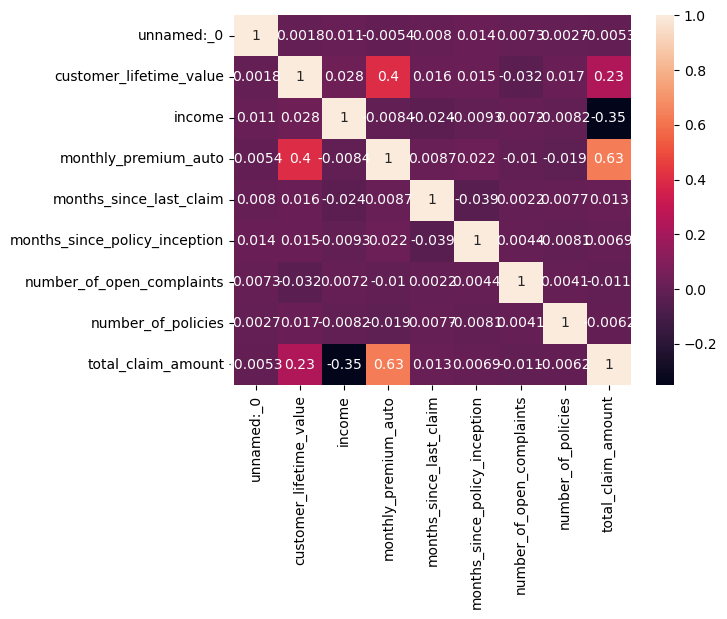

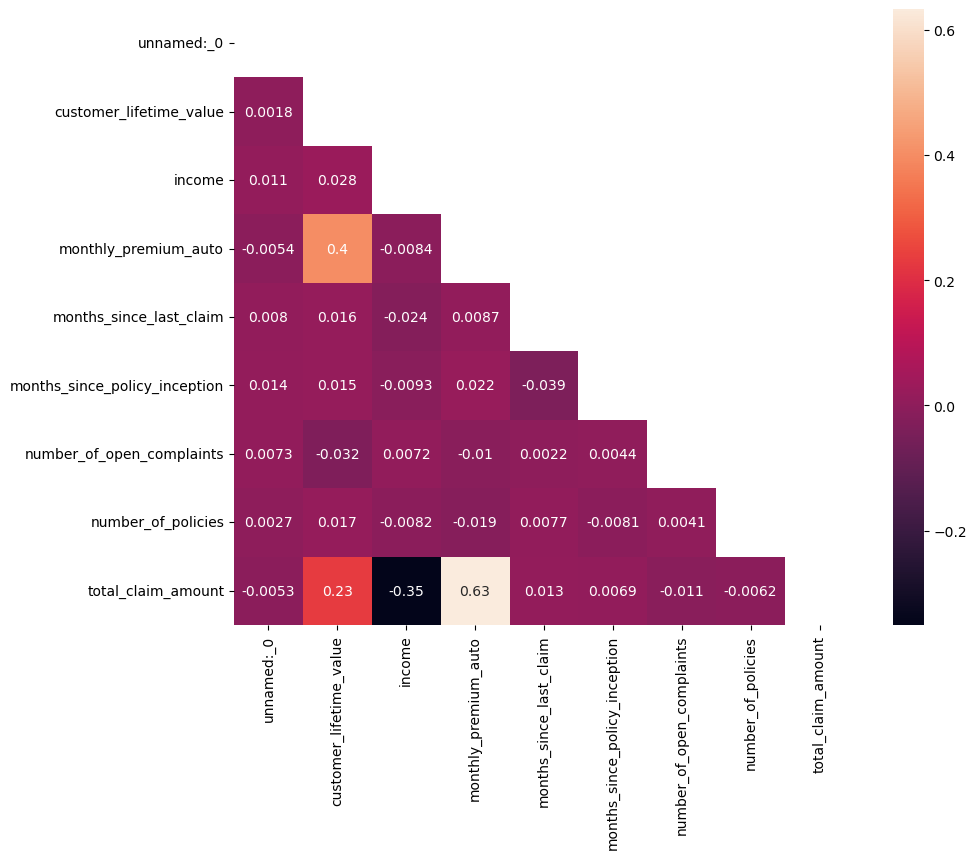

In [66]:

# Write code for both the correlation matrix and for seaborn heatmap. 

sns.heatmap(correlations_matrix, annot=True)
plt.show()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True # don't include if you think it will confuse the students right now
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [ ]:
# Drop one of the two features that show a high correlation between them (greater than 0.9). 
# If there is no pair of features that have a high correlation, then do not drop any features 

# There is no pair of features with high correlation, greater than 0.9